# EJERCICIO MAMDANI

In [1]:
from simpful import *

In [2]:
s_difuso_1 = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.10.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



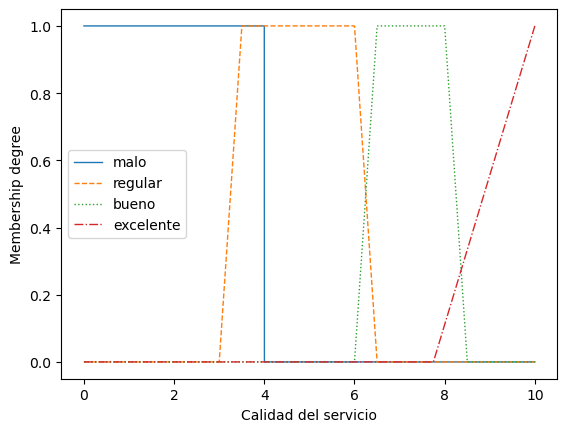

In [3]:
# Creamos los conjuntos difusos para la variable "Servicio"
# Definimos los intervalos y tipos de función apra cada conjunto
Se1 = FuzzySet(function=Crisp_MF(a=0,b=4), term="malo")
Se2 = FuzzySet(function=Trapezoidal_MF(a=3, b=3.5, c=6,d=6.5), term="regular")
Se3 = FuzzySet(function=Trapezoidal_MF(a=6, b=6.5, c=8, d=8.5), term="bueno")
Se4 = FuzzySet(function=Triangular_MF(a=7.75, b=10, c=10), term="excelente")

# Definimos los extremos entre los que está la variable lingüística.
rango_se = [0,10]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_se = LinguisticVariable([Se1,Se2,Se3,Se4], concept="Calidad del servicio", universe_of_discourse=rango_se)
s_difuso_1.add_linguistic_variable("Servicio", lv_se )

s_difuso_1.plot_variable("Servicio")

In [4]:
# Creamos los conjuntos difusos para la variable "Comida"
# Definimos los intervalos y tipos de función apra cada conjunto
Co1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="rancia")
Co2 = FuzzySet(function=Trapezoidal_MF(a=4, b=5, c=7, d=7.5), term="apetecible")
Co3 = FuzzySet(function=Triangular_MF(a=7, b=10, c=10), term="deliciosa")

# Definimos los extremos entre los que está la variable lingüística.
rango_co = [0,10]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_co = LinguisticVariable([Co1, Co2, Co3], concept="Calidad de la comida", universe_of_discourse=rango_co)
s_difuso_1.add_linguistic_variable("Comida", lv_co)

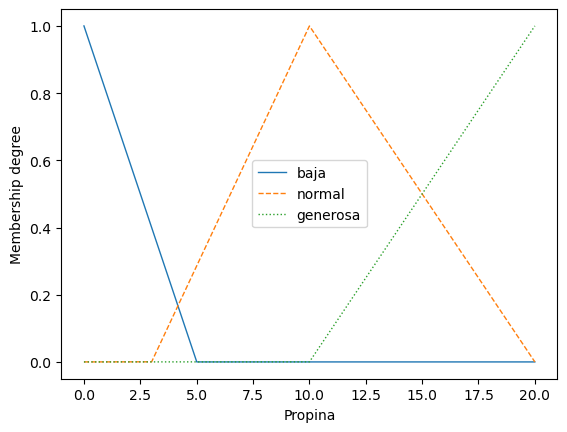

In [5]:
# Definimos la variable de salida "Propina" por medio de sus conjuntos difusos
Pr1 = FuzzySet(function=Triangular_MF(a=0, b=0, c=5), term="baja")
Pr2 = FuzzySet(function=Triangular_MF(a=3, b=10, c=20), term="normal")
Pr3 = FuzzySet(function=Trapezoidal_MF(a=10, b=20, c=25, d=25), term="generosa")

# Los extremos de la variable lingüística en este caso serán entre 0 y 20 (€)
rango_pr = [0,20]

# Creamos la variable lingüística, compuesta por nuestros conjuntos difusos 
# y la añadimos a las variables del sistema difuso 's_difuso_1'
lv_pr = LinguisticVariable([Pr1, Pr2, Pr3], universe_of_discourse=rango_pr)
s_difuso_1.add_linguistic_variable("Propina", lv_pr)
s_difuso_1.plot_variable("Propina")


In [6]:
# Definición de las reglas difusas
RULES = []
R1 = "IF ((Servicio IS malo) OR (Servicio IS regular)) AND (Comida IS rancia)  THEN (Propina IS baja)"
R2 = "IF (Servicio IS excelente) AND (Comida IS deliciosa) THEN (Propina IS generosa)"
R3 = "IF (Servicio IS regular) AND (Comida IS deliciosa) THEN (Propina IS normal)"
RULES.extend([R1,R2, R3])
s_difuso_1.add_rules(RULES)
s_difuso_1.set_variable("Servicio", 3)
s_difuso_1.set_variable("Comida", 2)
print(s_difuso_1.Mamdani_inference())

{'Propina': 1.8518385166020515}


In [7]:
s_difuso_1.set_variable("Servicio", 10)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 16.67333333333334}


### Ejercicio 1

In [8]:
s_difuso_1.set_variable("Servicio", 0)

s_difuso_1.set_variable("Comida", 5.5)

print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


### Ejercicio 2

In [9]:
s_difuso_1.set_variable("Servicio", 0)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


### Ejercicio 3

In [10]:
s_difuso_1.set_variable("Servicio", 3)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


### Ejercicio 5

In [11]:
s_difuso_1.set_variable("Servicio", -1)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 0}


In [12]:
s_difuso_1.set_variable("Servicio", 15)
s_difuso_1.set_variable("Comida", 10)
print(s_difuso_1.Mamdani_inference())

{'Propina': 16.67333333333334}
